In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# After importing the various tools we would use for our Analysis, let's load the dataset

netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()

# then lets have a view of the dataset briefly, lets see the first 5 rows..

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


**Using the info() method, we can glean more information on the dataset including the names of the different columns and their corresponding data types as well as the number of non-null values**

In [3]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# Preparing the data
**While our dataset does not appear to have any serious issues, <br>
we will nonetheless have to do some basic cleaning and transformation to get it ready for the main EDA task.**

# Missing values

**We will start by checking the dataset for missing or null values.<br> For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.**

In [4]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

**isna(). sum() returns the number of missing values in each column<br>
and our dataset has missing values in the director,cast,country, date added and rating column**

*We now have an idea of what data is missing and where. Typically, we have two options: delete rows that contain missing data or replace them with a value. In our case, deleting that many rows may affect our analysis, so we will go ahead and replace the values instead.*

**Several different methods exist for imputing missing values and what works best usually depends on the characteristics of the dataset in question as well as the objective of the analysis. One of the simplest methods is by replacing the null values in each column with the column mean or mode**

**Let's replace null values in the ratings column with 'Unavailable'**

In [11]:
netflix_df['rating'].fillna('Unavailable',inplace = True)

In [12]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

likewise, lets replace the null values in the director column with unavailable 

In [13]:
netflix_df['director'].fillna('Unavailable',inplace = True)

In [14]:
netflix_df.isna().sum()

show_id           0
type              0
title             0
director          0
cast            718
country         507
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [15]:
netflix_df['country'].fillna('Unavailable',inplace = True)

In [16]:
netflix_df.isna().sum()

show_id           0
type              0
title             0
director          0
cast            718
country           0
date_added       10
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

**Finally in cleaning up the dataset, we can drop irrelevant tables like the cast and date added**

In [18]:

netflix_df.drop(['cast'], axis=1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unavailable,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Unavailable,Unavailable,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Unavailable,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [19]:
netflix_df.drop(['date_added'], axis=1)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Unavailable,Nasty C,Unavailable,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Unavailable,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


**Analyzing the data**<br>

With our cleansed dataset we can go ahead and begin the task of exploring the data. While several different analyses exist for EDA, we can group them under three large umbrellas; univariate analysis, bivariate analysis, and multivariate analysis

## Netflix Content By Type


Analysis of the entire Netflix dataset consists of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.

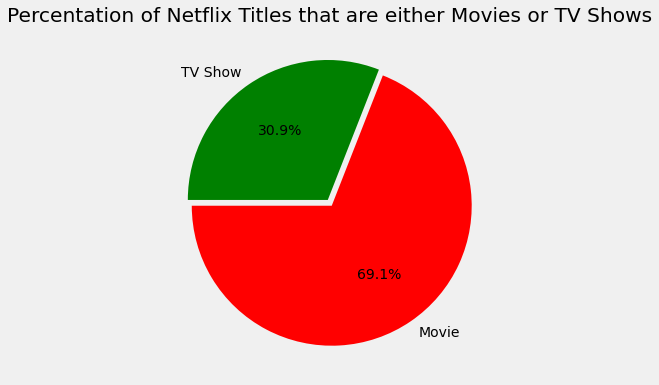

In [36]:
plt.figure(figsize=(12,6))
plt.title('Percentation of Netflix Titles that are either Movies or TV Shows')
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025),labels=netflix_df.type.value_counts().index, colors=['red','green'],autopct='%1.1f%%',startangle=180)
plt.show()

**So there are about 4,000++ movies and almost 2,000 TV shows, with movies being the majority. There are far more movie titles (68,5%) than TV shows titles (31,5%) in terms of title.**

## Countries by the Amount of the Produces Content

Next is exploring the countries by the amount it produces content of Netflix. We need to separate all countries within a film before analyzing it, then removing titles with no countries available

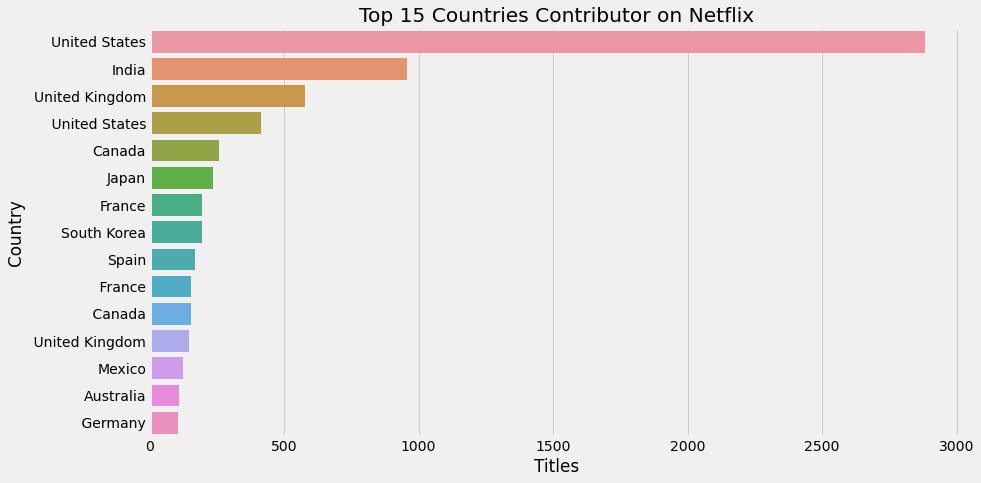

In [34]:
filtered_countries = netflix_df.set_index('title').country.str.split(',',expand=True).stack().reset_index(level = 1, drop=True);
filtered_countries  = filtered_countries[filtered_countries !='Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y=filtered_countries,order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()
    

**From the images above, we can see the top 15 countries contributor to Netflix. The country by the amount of the produces content is the United States**

## Top Directors on Netflix

To know the most popular director, we can visualize it.

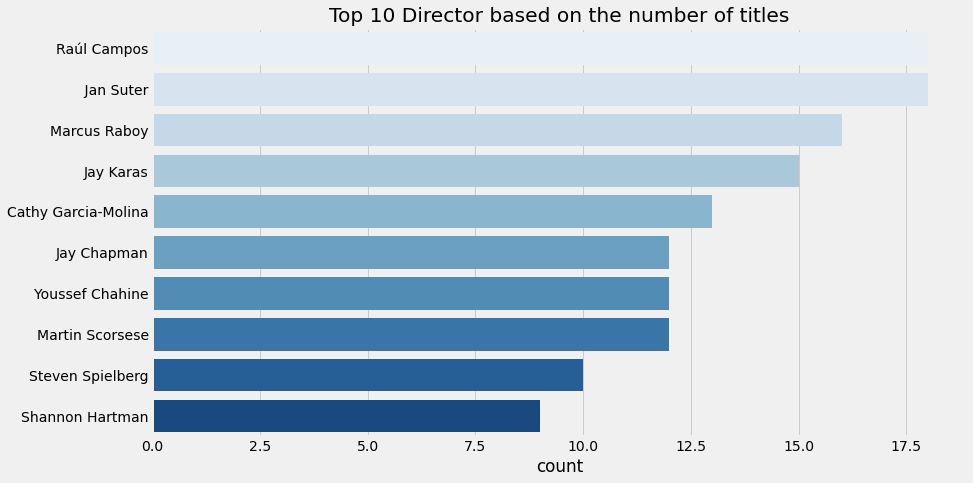

In [30]:
filtered_directors = netflix_df[netflix_df.director != 'Unavailable'].set_index('title').director.str.split(',',expand = True). stack().reset_index(level =1, drop=True)
plt.figure(figsize =(13,7))
plt.title('Top 10 Director based on the number of titles')
sns.countplot(y=filtered_directors,order=filtered_directors.value_counts().index[:10],palette = 'Blues')
plt.show()









**The most popular director on Netflix, with the most titles, is mainly international**

## Top Genres on Netflix

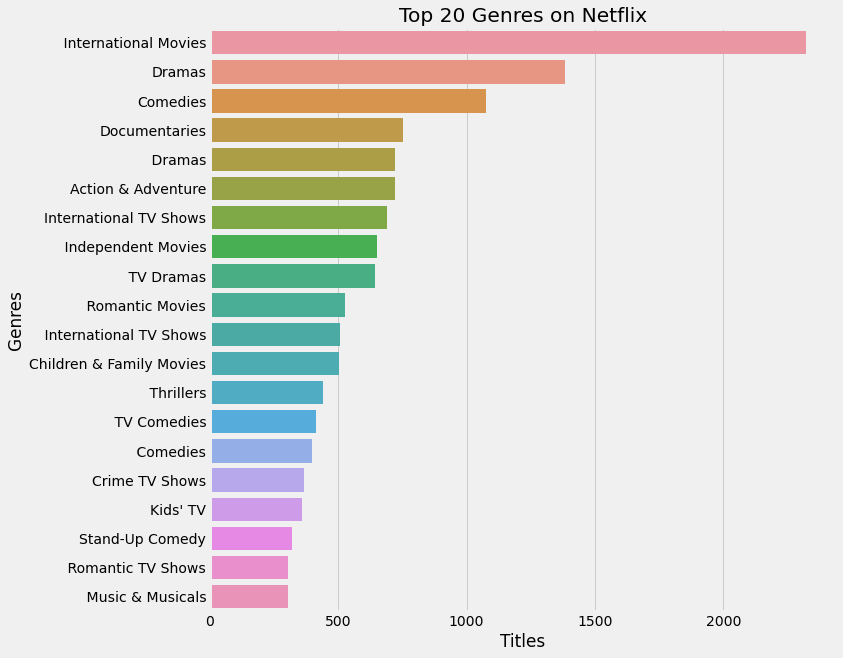

In [31]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(',',expand=True).stack().reset_index(level=1,drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y= filtered_genres,order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

**From the graph, we know that International Movies take the first place, followed by dramas and comedies**

# Top Actor on Netflix based on the number of titles

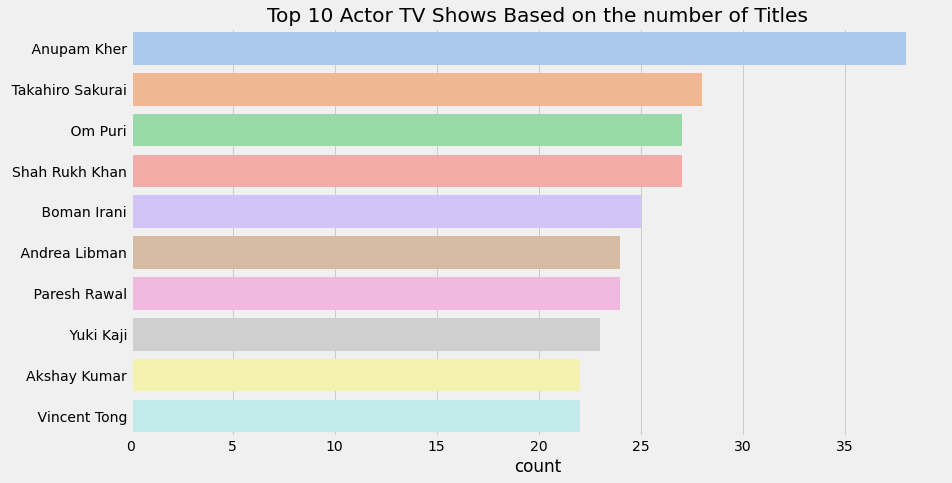

In [33]:



filtered_cast_shows = netflix_df[netflix_df.cast !='Unavailable'].set_index('title').cast.str.split(',',expand=True).stack().reset_index(level=1,drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on the number of Titles')
sns.countplot(y=filtered_cast_shows,order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

**The top actor on Netflix Movies, based on the number of titles, is Anupam Kher**

# Conclusions

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:
- The most content type on Netflix is movies,
- The country by the most amount of content it produces is the United States,
- The most popular director on Netflix , with the most titles, is Jan Suter.
- International Movies is a genre that is mostly viewed in Netflix,
- The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.